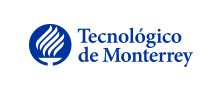

<h1><center>Campus Ciudad de México, 
Escuela Ingeniería y Ciencias, 
Computación</center></h1>

<h3><center>Course: TC3020.1 (Machine Learning)</center>
<center>Professor: Mauricio Rosales Rivera</center>
<center>Second Partial Evaluation</center></h3>
    
<h3><center>Date: November 2, 2021</center></h3>

---

<h3>Grade: </h3>

---
<h4><center>Student's information</center></h4>
<h4>Name: </h4><br>
<p> Monica Lara Pineda  <br>
 Manuel Ortiz Hernández <br> 
 Omar Alejandro Robledo Rodríguez <br> 
 Diego Ramírez Levy <br> 
 Raúl González Cardona </p>
<h4>Student ID: </h4>
 <p>A01655306 <br>
 A01655515 <br>
 A01338010 <br>
 A01367771 <br> 
 A01654995</p>

$$Apegándome al Código de Ética de los Estudiantes del Tecnológico de Monterrey, me comprometo a que mi actuación en este examen esté regida por la honestidad académica. En congruencia con el compromiso adquirido al firmar dicho código, realizaré este examen de forma honesta y personal, para reflejar, a través de él, mi conocimiento y aceptar, posteriormente, la evaluación obtenida.$$

# Examen Parcial 2 - Aprendizaje Máquina

---

Inidicaciones: El examen consta de ejercicios prácticos, los cuales se abordan lo visto en los temas 3 y 4.

Se evalua el desarrollo adecuado de la metodología para el ajuste de los datos, el modelo y la precisión del mismo.

* Fecha de liberación del examen: Viernes 22 de octubre.

* Fecha límite de entrega: Martes 2 de noviembre hasta las 23:59 hrs

Esta notebook deberá contener el nombre completo, matrícula y el link correspondiente al GitHub de cada integrante.

En caso de no tener la información aquí solicitada, no se evaluará el examen.

---
# Sección 1

### Ingeniería de Características

---

Tomando como referencia la información en la notebook <font color=red>"Feature_Engineering"</font>, deberán utilizar los archivos de <font color=blue>"train.csv"</font> y <font color=green>"test.csv"</font> como punto de referencia.

En esta notebook se realiza una parte importante del pre-procesamiento, que es la ingeniería de características, donde a partir del análisis estadístico preliminar, podríamos sustituir, ajustar, imputar datos o crear nuevas variables con fines prácticos.

----

Idea: Aplicar su propio pipeline para replicar o mejorar los resultados de predicción de los diversos algoritmos puestos en dicha notebook. Pueden enfocarse solamente en los primeros 5 algoritmos que tuvieron un desempeño mayor al 79% en este ejercicio.

----

En cada apartado, deberán explicar el preprocesamiento que realizaron, así como el porqué es conveniente (o no) aplicar validación cruzada (CV) y gridsearch.

In [1]:
# Importación de las librerías para el manejo de datos.
import pandas as pd
import numpy as np
import random as rnd

# Importación de las librerías para la visualización.
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Importación de modelos machine learning.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.tree import DecisionTreeClassifier

### Adquisión de datos:

In [2]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')
combine = [train_df, test_df]

# Clasificación
###### Es posible que queramos clasificar o categorizar nuestras muestras. También es posible que deseemos comprender las implicaciones o la correlación de diferentes clases con nuestro objetivo de solución.

### Análisis describiendo los datos:

* ¿Qué características están disponibles en el conjunto de datos?
 - Id del pasajero, sobrevivió o no, clase, nombre del pasajero, sexo del pasajero, edad del pasajero, sibsp,  parch, ticket, tarifa, cabina y embarque.
      
* ¿Qué variables son categóricas?
 - Survived, Pclass, Sex, SibSp, Embarked.
 
* ¿Hay variables numéricas?
 - Sí hay; PassengerId, Age, Fare.
 
* ¿Qué variables tienen tipos de datos mezclados? (numérico, alfanumérico, etc...)
 - Ticket y Cabin.

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


# Correlación
###### Se puede abordar el problema en función de las características disponibles dentro del conjunto de datos de entrenamiento. ¿Qué características dentro del conjunto de datos contribuyen significativamente a nuestro objetivo de solución? Hablando estadísticamente, ¿existe una correlación entre una característica y el objetivo de la solución? A medida que cambian los valores de las funciones, ¿cambia también el estado de la solución y viceversa? Esto se puede probar tanto para características numéricas como categóricas en el conjunto de datos dado.

### Análisis mediante pivoteo de clases:

In [6]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [7]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [8]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [9]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


##### De aquí podemos observar que los pivoteos se hacen siempre con base en la relación que tienen las clases con las personas que sobrevivieron:
- En Pclass observamos que la supervivencia aumenta o decrece dependiendo de la clase en la que viajan, entre más alta sea la clase, mayor la supervivencia.
- En Sex observamos que la supervivencia en hombres fue mucho menor que la supervivencia en mujeres.
- Por último en SibSp y Parch, no podemos observar en sí una tendencia clara y podemos concluir que esos pivoteos no nos aportan información relevante.

### Análisis Visual de los datos:

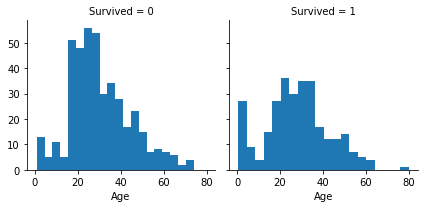

In [10]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

##### Aquí podemos visualizar la relación que existe entre edad y supervivencia, en donde vemos que las personas que más sobrevivieron están entre los 20 y 40 años de edad, así mismo observamos que el índice de supervivencia empieza a decrementar a partir de los 40 años de edad.

# Corrección
###### También podemos analizar el conjunto de datos de entrenamiento dado en busca de errores o posiblemente valores inexactos dentro de las características e intentar correngir estos valores o excluir las muestras que contienen los errores. Una forma de hacer esto es detectar cualquier valor atípico entre nuestras muestras o características. También podemos descartar por completo una característica si no contribuye al análisis o puede sesgar significativamente los resultados.

In [11]:
print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]

print("After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

Before (891, 12) (418, 11) (891, 12) (418, 11)
After (891, 10) (418, 9) (891, 10) (418, 9)


# Creando
###### ¿Podemos crear nuevas características basadas en una característica existente o un conjunto de características, de modo que la nueva característica siga los objetivos de correlación, conversión e integridad?

In [12]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


 -- Se creó una categorización con base en los titulos que contiene cada nombre.

In [13]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


-- Se cambió a los titulos por uno estándar.

### Categorización del DataSet:

In [14]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


### Eliminación columna PassengerId y Name:

In [15]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 9), (418, 9))

In [16]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,3
2,1,3,female,26.0,0,0,7.9250,S,2
3,1,1,female,35.0,1,0,53.1000,S,3
4,0,3,male,35.0,0,0,8.0500,S,1


-- Eliminamos la variable nombre ya que está no nos aporta información de importancia, solo nos quedamos con los titulos, así mismo nos deshacemos de la columna de PassengerId.

### Conversión de la variable Sex:

In [17]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [18]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


-- Esta conversión de la variable Sex la realizamos para tener un mejor manejo en los modelos de ML, así podemos asegurar que female tendrá el valor de 1 y male el valor de 0.

### Categorización de intervalos en Age:

In [19]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

### Iteración sobre Sex y Pclass:

In [20]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

In [21]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


-- La iteración se realiza para calcular los valores de Age para las seis combinaciones.

In [22]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


-- Se crean los intervalos de edad con el fin de determinar la correlación con Survived.

### Estandarización de los intervalos de Age:

In [23]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


### Eliminación de la columna AgeBand:

In [24]:
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


### Creación de la columna FamilySize:

In [25]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


-- La variable FamilySize se crea para poder combinar Parch y SibSp.

* Se crea la columna IsAlone para el caso en que el pasajero iba solo y no entra ni en SibSp ni en Parch:

In [26]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


### Eliminación columnas SibSp, Parch y FamilySize:

In [27]:
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


### Combinación columnas Pclass y Age:

In [28]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


# Completando
###### La preparación de datos también puede requerir que estimemos los valores faltantes dentro de una característica. Los algoritmos pueden funcionar mejor cuando no faltan valores.

In [29]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [30]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


### Conversión variables categóricas a numéricas:

In [31]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,1,1,6


- Completamos la variable Fare para sus valores faltantes, usando el valor que ocurre con mayor frecuencia.

In [32]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,7.8292,2,1,1,6
1,893,3,1,2,7.0000,0,3,0,6
2,894,2,0,3,9.6875,2,1,1,6
3,895,3,0,1,8.6625,0,1,1,3
4,896,3,1,1,12.2875,0,3,0,3


- Creeamos un intervalo para esta misma variable.

In [33]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


* Realizamos una estandarización de los valores (0, 1, 2, 3).

In [34]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]

In [35]:
train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6
5,0,3,0,1,1,2,1,1,3
6,0,1,0,3,3,0,1,1,3
7,0,3,0,0,2,0,4,0,0
8,1,3,1,1,1,0,3,0,3
9,1,2,1,0,2,1,3,0,0


In [36]:
test_df.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,0,2,1,1,6
1,893,3,1,2,0,0,3,0,6
2,894,2,0,3,1,2,1,1,6
3,895,3,0,1,1,0,1,1,3
4,896,3,1,1,1,0,3,0,3
5,897,3,0,0,1,0,1,1,0
6,898,3,1,1,0,2,2,1,3
7,899,2,0,1,2,0,1,0,2
8,900,3,1,1,0,1,3,1,3
9,901,3,0,1,2,0,1,0,3


# DataSet Listo
###### Después de haber realizado todos los pasos anteriores, nuestro dataset ya está listo para poder aplicar los modelos de Machine Learning que nos piden en la sección 1, los cuales son CV y GridSearch.

-- Variables independientes:

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler

X = train_df.drop(train_df.columns[0], axis=1)
Y = train_df['Survived']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=100)

-- Importamos liberías para la creación de los pipelines para nuestros modelos y para la normalización de nuestros datos:

* Creación de pipelines para los top 5 modelos de ML:

In [38]:
dt_pl = make_pipeline(RobustScaler(), DecisionTreeClassifier())
rf_pl = make_pipeline(RobustScaler(), RandomForestClassifier(n_estimators=10, max_depth=3, random_state=10))
lr_pl = make_pipeline(RobustScaler(), LogisticRegression(solver='liblinear'))
nb_pl = make_pipeline(RobustScaler(), KNeighborsClassifier())
svc_pl = make_pipeline(RobustScaler(), SVC())

# CrossValidation(CV):

* Decision Tree:

In [39]:
folds = KFold(n_splits = 5, shuffle=True, random_state=100)
accuracy_df = pd.DataFrame()
for train_index, test_index in folds.split(train_df):
    X_train = X.iloc[train_index]
    X_test = X.iloc[test_index]
    Y_train = Y.iloc[train_index]
    Y_test = Y.iloc[test_index]
    dt_pl.fit(X_train, Y_train)
    df = {'Train_Accuracy':accuracy_score(Y_train, dt_pl.predict(X_train)), 
          'Test_Accuracy':accuracy_score(Y_test, dt_pl.predict(X_test))}
    accuracy_df = accuracy_df.append(df, ignore_index = True)

In [40]:
accuracy_df

,Train_Accuracy,Test_Accuracy
0,0.866573,0.810056
1,0.877980,0.775281
2,0.872370,0.831461
3,0.861150,0.859551
4,0.880785,0.758427


* Random Forest:

In [41]:
folds = KFold(n_splits = 5, shuffle=True, random_state=100)
accuracy_df = pd.DataFrame()
for train_index, test_index in folds.split(train_df):
    X_train = X.iloc[train_index]
    X_test = X.iloc[test_index]
    Y_train = Y.iloc[train_index]
    Y_test = Y.iloc[test_index]
    rf_pl.fit(X_train, Y_train)
    df = {'Train_Accuracy':accuracy_score(Y_train, rf_pl.predict(X_train)), 
          'Test_Accuracy':accuracy_score(Y_test, rf_pl.predict(X_test))}
    accuracy_df = accuracy_df.append(df, ignore_index = True)

In [42]:
accuracy_df

,Train_Accuracy,Test_Accuracy
0,0.799157,0.798883
1,0.800842,0.730337
2,0.791024,0.814607
3,0.785414,0.820225
4,0.800842,0.792135


* Logistic Regression:

In [43]:
folds = KFold(n_splits = 5, shuffle=True, random_state=100)
accuracy_df = pd.DataFrame()
for train_index, test_index in folds.split(train_df):
    X_train = X.iloc[train_index]
    X_test = X.iloc[test_index]
    Y_train = Y.iloc[train_index]
    Y_test = Y.iloc[test_index]
    lr_pl.fit(X_train, Y_train)
    df = {'Train_Accuracy':accuracy_score(Y_train, lr_pl.predict(X_train)), 
          'Test_Accuracy':accuracy_score(Y_test, lr_pl.predict(X_test))}
    accuracy_df = accuracy_df.append(df, ignore_index = True)

In [44]:
accuracy_df

,Train_Accuracy,Test_Accuracy
0,0.808989,0.826816
1,0.807854,0.769663
2,0.809257,0.808989
3,0.788219,0.814607
4,0.806452,0.792135


* KNeighbors:

In [45]:
folds = KFold(n_splits = 5, shuffle=True, random_state=100)
accuracy_df = pd.DataFrame()
for train_index, test_index in folds.split(train_df):
    X_train = X.iloc[train_index]
    X_test = X.iloc[test_index]
    Y_train = Y.iloc[train_index]
    Y_test = Y.iloc[test_index]
    nb_pl.fit(X_train, Y_train)
    df = {'Train_Accuracy':accuracy_score(Y_train, nb_pl.predict(X_train)), 
          'Test_Accuracy':accuracy_score(Y_test, nb_pl.predict(X_test))}
    accuracy_df = accuracy_df.append(df, ignore_index = True)

In [46]:
accuracy_df

,Train_Accuracy,Test_Accuracy
0,0.834270,0.804469
1,0.861150,0.775281
2,0.837307,0.786517
3,0.824684,0.853933
4,0.856942,0.786517


* SCV:

In [47]:
folds = KFold(n_splits = 5, shuffle=True, random_state=100)
accuracy_df = pd.DataFrame()
for train_index, test_index in folds.split(train_df):
    X_train = X.iloc[train_index]
    X_test = X.iloc[test_index]
    Y_train = Y.iloc[train_index]
    Y_test = Y.iloc[test_index]
    svc_pl.fit(X_train, Y_train)
    df = {'Train_Accuracy':accuracy_score(Y_train, svc_pl.predict(X_train)), 
          'Test_Accuracy':accuracy_score(Y_test, svc_pl.predict(X_test))}
    accuracy_df = accuracy_df.append(df, ignore_index = True)

In [48]:
accuracy_df

,Train_Accuracy,Test_Accuracy
0,0.785112,0.787709
1,0.788219,0.764045
2,0.784011,0.780899
3,0.771388,0.825843
4,0.792426,0.741573


# GridSearch:

* Decision Tree:

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

pipeline = Pipeline([('classifier', DecisionTreeClassifier())])
params = {"classifier__max_depth": [0.4]}

gridsearch = GridSearchCV(pipeline, param_grid=params, cv=8, scoring='accuracy', verbose=1, return_train_score=True)
gridsearch.fit(X_train, Y_train)
Y_pred = gridsearch.predict(X_test)

test_score = accuracy_score(Y_test, dt_pl.predict(X_test))

print('Cross Validation Score:', gridsearch.best_score_)
print('Accuracy Score on test data set:', test_score)

Fitting 8 folds for each of 1 candidates, totalling 8 fits
Cross Validation Score: 0.6317412507171543
Accuracy Score on test data set: 0.8834080717488789


* Random Forest:

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

pipeline = Pipeline([('classifier', RandomForestClassifier(n_estimators=8))])
params = {"classifier__max_depth": [0.4]}

gridsearch = GridSearchCV(pipeline, param_grid=params, cv=8, scoring='accuracy', verbose=1, return_train_score=True)
gridsearch.fit(X_train, Y_train)
Y_pred = gridsearch.predict(X_test)

test_score = accuracy_score(Y_test, dt_pl.predict(X_test))

print('Cross Validation Score:', gridsearch.best_score_)
print('Accuracy Score on test data set:', test_score)

Fitting 8 folds for each of 1 candidates, totalling 8 fits
Cross Validation Score: 0.6317412507171543
Accuracy Score on test data set: 0.8834080717488789


* Logistic Regression:

In [68]:
pipeline = make_pipeline(RobustScaler(), SelectKBest(f_classif), LogisticRegression(solver='lbfgs'))

param_grid = {'selectkbest__k': [i+1 for i in range(8)], 'logisticregression__class_weight': [None,'balanced'], 'logisticregression__C': [.1, 1.0, 10.0, 100.00, 1000.0, 10000.0], 'logisticregression__solver': ['lbfgs', 'liblinear']}
gridsearch = GridSearchCV(pipeline, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, return_train_score=True)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, shuffle=True, random_state=100)
gridsearch.fit(X_train, Y_train)
Y_pred = gridsearch.predict(X_test)

test_score = accuracy_score(Y_test, dt_pl.predict(X_test))

print('Cross Validation Score:', gridsearch.best_score_)
print('Accuracy Score on test data set:', test_score)

Fitting 5 folds for each of 192 candidates, totalling 960 fits
Cross Validation Score: 0.8083492312871732
Accuracy Score on test data set: 0.8834080717488789


* KNeighbors:

In [69]:
from sklearn.pipeline import Pipeline

knn = KNeighborsClassifier()
pipeline = Pipeline(steps=[('knn', knn)])
params = {'knn__n_neighbors': [2,5,15, 30, 45, 64]}

gridsearch = GridSearchCV(pipeline, param_grid=params, cv=10, scoring='accuracy', verbose=1, return_train_score=True)
gridsearch.fit(X_train, Y_train)
Y_pred = gridsearch.predict(X_test)

test_score = accuracy_score(Y_test, dt_pl.predict(X_test))

print('Cross Validation Score:', gridsearch.best_score_)
print('Accuracy Score on test data set:', test_score)

Fitting 10 folds for each of 6 candidates, totalling 60 fits
Cross Validation Score: 0.8157847127996382
Accuracy Score on test data set: 0.8834080717488789


* SCV:

In [72]:
pipeline = make_pipeline(RobustScaler(), SelectKBest(f_classif), SVC(C=0.1))
params = {'selectkbest__k': [i+1 for i in range(8)], 'svc__class_weight': [None,'balanced'], 'svc__C': [.1, 1.0, 10.0, 100.00, 1000.0, 10000.0]}

gridsearch = GridSearchCV(pipeline, param_grid=params, cv=5, scoring='accuracy', verbose=1, return_train_score=True)
gridsearch.fit(X_train, Y_train)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, shuffle=True, random_state=100)

test_score = accuracy_score(Y_test, dt_pl.predict(X_test))

print('Cross Validation Score:', gridsearch.best_score_)
print('Accuracy Score on test data set:', test_score)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Cross Validation Score: 0.8263382336438111
Accuracy Score on test data set: 0.8834080717488789


# Conclusión:
### Después de realizar el preprocesamiento de los datos y de la implementación de Cross Validation (CV) y de GridSearch, creemos que el modelo de Cross Validation con KFolds y en específico apoyado de Decision Tree, es el mejor modelo a implementar, ya que su accuracy se toma con base en "dobleces" aleatorios, tomando por cada doblez los diferentes atributos o columnas de nuestro dataframe de Titanic (una vez que este quedó totalmente limpio y completo), con esto finalmente obtuvimos un accuracy de 80% promedio.
### Así mismo en cuanto a la precisión de los diferentes modelos, encontramos una correlación con nuestro accuracy general que como mencionamos rondó entre un 80% promedio.

---
--- 

# Sección 2

### Recomendaciones usando técnicas de ML (Web Scrapping, Supervised, Unsupervised)

---

Tomando como referencia la información en la notebook <font color=red>"Unsupervised_Prediction"</font>, deberán utilizar los archivos de <font color=blue>"anime.csv"</font> y <font color=green>"rating.csv"</font> como punto de referencia.

En esta notebook se realiza una parte importante del pre-procesamiento. Posteriormente, la aplicación del análisis de componentes principales (PCA), k-means y la descripción de las recomendaciones para al menos 3 clusters generados.

Aplicar la técnica de webscrapping y explicar su funcionamiento (**puede tardar desde 10 minutos hasta 1 hora aproximadamente; dependiendo la cantidad de registros que hayan usado**). Tomen en cuenta que esta búsqueda va acorde a los ids del conjunto de datos que les hace falta información y, a partir de esta técnica de minería de datos, completamos los registros faltantes.

Posteriormente, entrenar el algoritmo de k-NN para obtener las distancias de cada id del conjunto de datos, para obtener los indices y distancias correspondientes que nos servirán para proporcionar recomendaciones con respecto a estos resultados.

----

Idea: Aplicar su propio pipeline para replicar los resultados de predicción/recomendación de este ejercicio.

----

En cada apartado, deberán explicar el preprocesamiento que realizaron.

In [233]:
%matplotlib inline

plt.rcParams['figure.figsize'] = (6, 4)
plt.style.use('ggplot')
%config InlineBackend.figure_formats = {'png', 'retina'}

2021-11-03 18:01:50 [matplotlib.pyplot] DEBUG: Loaded backend module://ipykernel.pylab.backend_inline version unknown.


In [142]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

anime = pd.read_csv('data/anime.csv')
user = pd.read_csv('data/rating.csv')
user

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1
...,...,...,...
7813732,73515,16512,7
7813733,73515,17187,9
7813734,73515,22145,10
7813735,73516,790,9


### Actualizar el rating del dataframe de user

In [143]:
MRPU = user.groupby(['user_id']).mean().reset_index()

In [144]:
MRPU

,user_id,anime_id,rating
0,1,12888.483660,-0.712418
1,2,13459.000000,2.666667
2,3,13352.744681,7.382979
3,4,10135.403846,-1.000000
4,5,11023.301927,4.263383
...,...,...,...
73510,73512,402.000000,7.846154
73511,73513,1361.575758,7.515152
73512,73514,512.000000,10.000000
73513,73515,4485.158163,7.719388


In [145]:
MRPU['mean_rating'] = MRPU['rating']
MRPU.drop(['anime_id','rating'],axis=1, inplace=True)

In [146]:
user = pd.merge(user,MRPU,on=['user_id','user_id'])
user = user.drop(user[user.rating < user.mean_rating].index)

In [147]:
user = user.rename({'rating':'userRating'}, axis='columns')
user

,user_id,anime_id,userRating,mean_rating
47,1,8074,10,-0.712418
81,1,11617,10,-0.712418
83,1,11757,10,-0.712418
101,1,15451,10,-0.712418
153,2,11771,10,2.666667
...,...,...,...,...
7813730,73515,13659,8,7.719388
7813733,73515,17187,9,7.719388
7813734,73515,22145,10,7.719388
7813735,73516,790,9,9.000000


Almacenamos ls unión entre el user_id y su nombre, de acuerdo al anime correspondiente, para tener en cuenta todos los animes que han sido calificados por los usuarios.

In [148]:
mergedata = pd.merge(anime,user,on=['anime_id','anime_id'])
mergedata= mergedata[mergedata.user_id <= 20000]

In [150]:
user_anime = pd.crosstab(mergedata['user_id'], mergedata['name'])

### Análisis de componenetes principales

Importamos libreria de PCA.

In [152]:
from sklearn.decomposition import PCA

Instaciamos con el número de componentes con lo que queremos trabajar y trabajaremos con <i>user_anime</i> con el cual hemos trabajado previamente para obtener todos los animes.

In [156]:
pca = PCA(n_components=5)
pca.fit(user_anime)

PCA(n_components=5)

Cada fila de los datos en el espacio vectorial que se aprendió cuando se llamó a <i>pca.fit</i>. Para cada fila de los datos que pase para transformar, tendrá 1 fila en la salida y el número de columnas en esa fila será el número de vectores que se aprendieron en la fase de ajuste. En otras palabras, el número de columnas será igual al valor de n_components que definimos.

In [157]:
pca_samples = pca.transform(user_anime)

### Guardamos lo obtenido previamente, con los 5 componenetes visibles que fueron declarados inicialmente.

In [158]:
ps = pd.DataFrame(pca_samples)
ps.head()

,0,1,2,3,4
0,-1.579129,-0.500240,0.415762,-0.251585,-0.145237
1,-1.773553,-0.272593,0.116389,-0.302295,0.107656
2,0.218814,-1.232282,-0.985802,1.654670,-0.128911
3,0.199435,-0.291005,0.681051,0.774574,-0.406960
4,3.532125,-0.184796,-0.743309,0.692959,0.255935


Agrupamos cada componente

In [159]:
tocluster = pd.DataFrame(ps[[0,1,2,3,4]])

### Graficamos los componentes

<ipython-input-160-dea15d0684be>:5: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


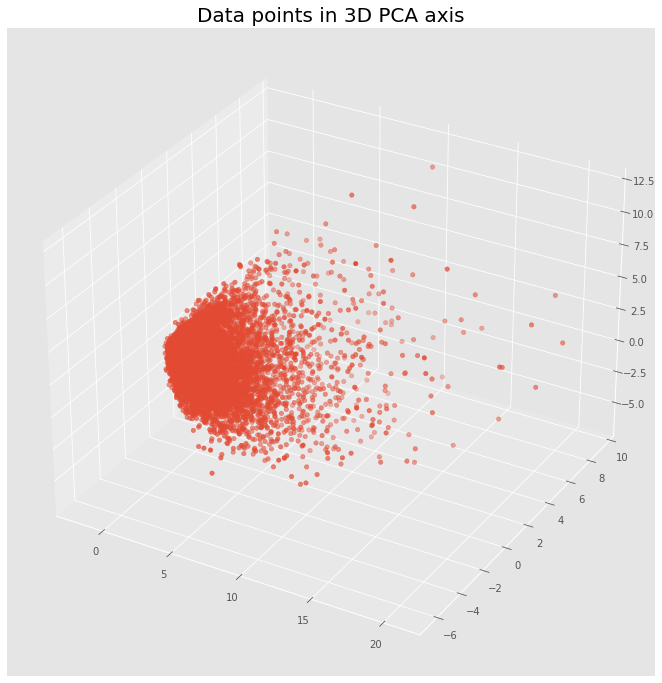

In [160]:
plt.rcParams['figure.figsize'] = (16, 9)


fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(tocluster[0], tocluster[2], tocluster[1])

plt.title('Data points in 3D PCA axis', fontsize=20)
plt.show()

### k-means

Vamos a establecer nuestros clusters con kmeans

En nuestro caso ocuparemos 9 clusters

In [163]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

scores = []
inertia_list = np.empty(9)

for i in range(2,9):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(tocluster)
    inertia_list[i] = kmeans.inertia_
    scores.append(silhouette_score(tocluster, kmeans.labels_))

### Graficamos los clusters

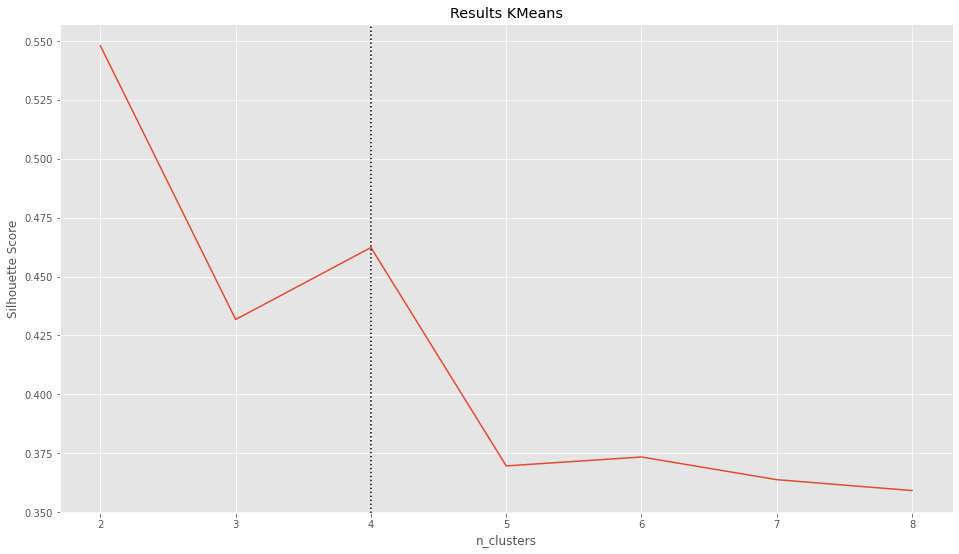

In [169]:
plt.plot(range(2,9), scores);
plt.title('Results KMeans')
plt.xlabel('n_clusters');
plt.axvline(x=4, color='black', linestyle=':')
plt.ylabel('Silhouette Score');
plt.show()

Podemos observar en la gráfica anterior que el punto de quiebre se encuentra en el 5to cluster

Establecemos nuestros clusters y la semilla inicial con la que queremos trabajar con k-means

In [174]:
from sklearn.cluster import KMeans

clusterer = KMeans(n_clusters=9,random_state=30).fit(tocluster)
centers = clusterer.cluster_centers_
c_preds = clusterer.predict(tocluster)
print(centers)

[[ 0.33311329 -0.63723842 -0.41620443  0.43036559 -0.33550507]
 [ 2.38498669 -1.62320476  1.02250609 -0.04858746 -0.3941432 ]
 [ 6.80160191 -2.71840796  0.9111926  -0.49792947 -0.23192768]
 [-1.36147539 -0.11824349  0.12761747 -0.1683869   0.07669098]
 [ 2.88939298  3.39248263  0.88550214  0.09912197 -0.42637588]
 [ 3.2993631  -0.01877959 -2.00861995 -0.47163909 -0.32042888]
 [-0.03581322  1.35150846 -0.08856008  0.0866088  -0.27207208]
 [10.41431538  2.95251673  1.41140696 -1.25695601  1.15505155]
 [ 1.34153245 -0.03085383 -0.42560952  1.46528135  2.0082287 ]]


<ipython-input-176-f1df80aff24a>:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


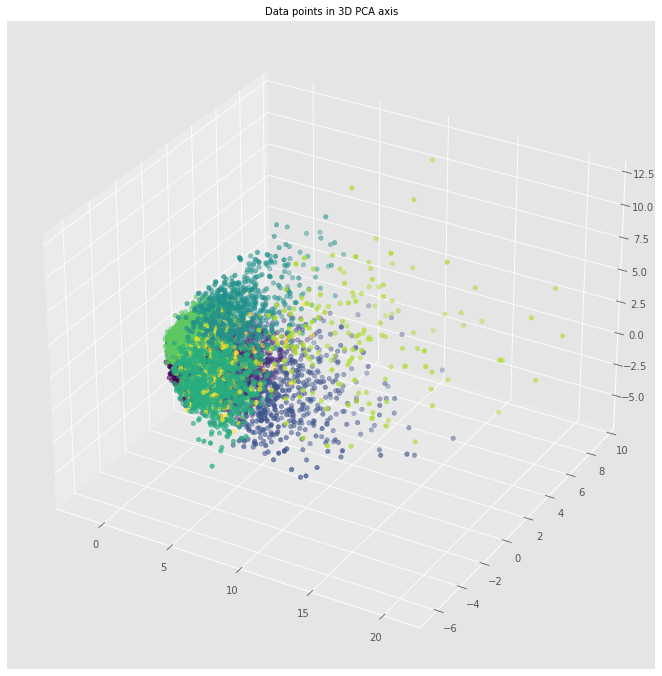

In [176]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(tocluster[0], tocluster[2], tocluster[1], c = c_preds)
plt.title('Data points in 3D PCA axis', fontsize=10)
plt.show()

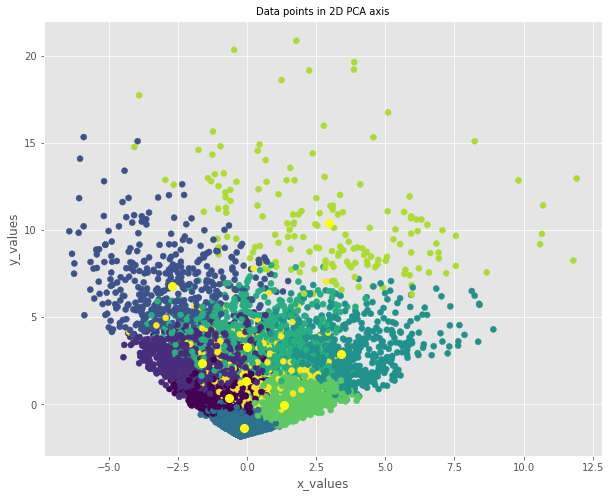

In [177]:
fig = plt.figure(figsize=(10,8))
plt.scatter(tocluster[1],tocluster[0],c = c_preds)
for ci,c in enumerate(centers):
    plt.plot(c[1], c[0], 'o', markersize=8, color='yellow', alpha=1)

plt.xlabel('x_values')
plt.ylabel('y_values')

plt.title('Data points in 2D PCA axis', fontsize=10)
plt.show()

### Descripción de recomendaciones de 3 clusters generados

In [184]:
def createAnimeInfoList(animelist):
    episode_list = list()
    genre_list = list()
    member_list = list()
    rating_list= list()
    for x in anime['name']:
        if x in animelist:
            episode_list.append(anime[anime['name']==x].episodes.values.astype(int))
            member_list.append(anime[anime['name']==x].members.values.astype(int))
            rating_list.append(anime[anime['name']==x].rating.values.astype(int))
            for y in anime[anime['name']==x].genre.values:
                 genre_list.append(y)
    return genre_list,episode_list,rating_list,member_list

In [185]:
def count_word(df, ref_col, liste):
    keyword_count = dict()
    for s in liste: keyword_count[s] = 0
    for liste_keywords in df[ref_col].str.split(','):        
        if type(liste_keywords) == float and pd.isnull(liste_keywords): continue        
        for s in [s for s in liste_keywords if s in liste]: 
            if pd.notnull(s): keyword_count[s] += 1
    #______________________________________________________________________
    # convert the dictionary in a list to sort the keywords by frequency
    keyword_occurences = []
    for k,v in keyword_count.items():
        keyword_occurences.append([k,v])
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    return keyword_occurences, keyword_count

Vamos a separar 3 clusters para observar sus diferencias

In [187]:
user_anime['cluster'] = c_preds
c0 = user_anime[user_anime['cluster']==0].drop('cluster',axis=1).mean()
c1 = user_anime[user_anime['cluster']==1].drop('cluster',axis=1).mean()
c2 = user_anime[user_anime['cluster']==2].drop('cluster',axis=1).mean()

### 10 mejores animes en cada cluster

In [188]:
c0.sort_values(ascending=False)[0:10]


name
Shingeki no Kyojin                    0.674773
Death Note                            0.591289
Sword Art Online                      0.541561
Fullmetal Alchemist: Brotherhood      0.519419
Code Geass: Hangyaku no Lelouch       0.463158
Steins;Gate                           0.454083
No Game No Life                       0.453358
Angel Beats!                          0.433757
Code Geass: Hangyaku no Lelouch R2    0.430127
Mirai Nikki (TV)                      0.415608
dtype: float64

NameError: name 'set_keywords' is not defined

In [191]:
c1.sort_values(ascending=False)[0:10]


name
Sword Art Online              0.778660
No Game No Life               0.678131
Angel Beats!                  0.678131
Shingeki no Kyojin            0.651675
High School DxD               0.582892
Toradora!                     0.574074
Mirai Nikki (TV)              0.559965
Sakurasou no Pet na Kanojo    0.533510
Highschool of the Dead        0.518519
Date A Live                   0.505291
dtype: float64

In [192]:
c2.sort_values(ascending=False)[0:10]

name
No Game No Life                                        0.908873
Angel Beats!                                           0.846523
Sword Art Online                                       0.834532
Shingeki no Kyojin                                     0.820144
Toradora!                                              0.784173
Yahari Ore no Seishun Love Comedy wa Machigatteiru.    0.779376
Chuunibyou demo Koi ga Shitai!                         0.769784
Noragami                                               0.767386
Log Horizon                                            0.764988
Hataraku Maou-sama!                                    0.764988
dtype: float64

Como podemos observar, en cada cluster nos encontramos con datos que varían, más no cambian en su totalidad.

Dependiendo el cluster, trabajaremos con sus datos y asignaremos valores como el género, el episodio, el rating y el miembro. Principlamente, colaboraremos

In [194]:
def getClusterAnimeInfo(animelist):
    data = pd.DataFrame()
    data['genre'],data['episode'],data['rating'],data['member'] = createAnimeInfoList(animelist)
    set_keywords = set()
    for liste_keywords in data['genre'].str.split(',').values:
        if isinstance(liste_keywords, float): continue  # only happen if liste_keywords = NaN
        set_keywords = set_keywords.union(liste_keywords)
    return set_keywords

In [223]:
animelist0 = list(c0.index)
animelist1 = list(c1.index)
animelist2 = list(c2.index)

set_kw0 = getClusterAnimeInfo(animelist0)
set_kw1 = getClusterAnimeInfo(animelist1)
set_kw2 = getClusterAnimeInfo(animelist2)

In [249]:
import sys
print(sys.executable)

/usr/local/Cellar/jupyterlab/3.0.14/libexec/bin/python3.9


In [248]:
pip install wordcloud

  Using cached wordcloud-1.8.1.tar.gz (220 kB)
  ERROR: Command errored out with exit status 1:
   command: /usr/local/Cellar/jupyterlab/3.0.14/libexec/bin/python3.9 -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/private/var/folders/sf/g5ymj2k91y14t_gz7d7wqzdr0000gn/T/pip-install-8wvmewu1/wordcloud_4ce51246fc844e93a4e5a5a1c5246868/setup.py'"'"'; __file__='"'"'/private/var/folders/sf/g5ymj2k91y14t_gz7d7wqzdr0000gn/T/pip-install-8wvmewu1/wordcloud_4ce51246fc844e93a4e5a5a1c5246868/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d /private/var/folders/sf/g5ymj2k91y14t_gz7d7wqzdr0000gn/T/pip-wheel-uhdsdvsp
       cwd: /private/var/folders/sf/g5ymj2k91y14t_gz7d7wqzdr0000gn/T/pip-install-8wvmewu1/wordcloud_4ce51246fc844e93a4e5a5a1c5246868/
  Complete output (24 lines):
  running bdist_wheel
  running build
  running build_py
  creating build

Note: you may need to restart the kernel to use updated packages.


In [253]:
from wordcloud import WordCloud

def makeCloud(Dict,name,color):
    words = dict()
    for s in Dict:
        words[s[0]] = s[1]
        wordcloud = WordCloud(
                      width=1500,
                      height=500, 
                      background_color=color, 
                      max_words=20,
                      max_font_size=500, 
                      normalize_plurals=False)
        wordcloud.generate_from_frequencies(words)
    fig = plt.figure(figsize=(12, 8))
    plt.title(name)
    plt.imshow(wordcloud)
    plt.axis('off')

    plt.show()

ModuleNotFoundError: No module named 'wordcloud'

## Cluster 1

In [252]:
c0_animelist = list(c0.sort_values(ascending=False)[0:10].index)
c0_data = pd.DataFrame()
c0_data['genre'],c0_data['episode'],c0_data['rating'],c0_data['member'] =  createAnimeInfoList(c0_animelist)
c0_data.iloc[:,1:4] = c0_data.iloc[:,1:4].astype(int) # change to numeric object to integer
keyword_occurences, dum = count_word(c0_data, 'genre', set_kw0)
makeCloud(keyword_occurences[0:10],"cluster 0","lemonchiffon")

NameError: name 'makeCloud' is not defined

In [ ]:
keyword_occurences[0:10]

In [ ]:
print('cluster 0\nAVG episode : {0}\nAVG movie rating : {1}\nAVG member : {2}'
      .format(c0_data['episode'].mean(), c0_data['rating'].mean(),c0_data['member'].mean()))

## Cluster 2

In [ ]:
c1_animelist = list(c1.sort_values(ascending=False)[0:10].index)
c1_data = pd.DataFrame()
c1_data['genre'],c1_data['episode'],c1_data['rating'],c1_data['member'] =  createAnimeInfoList(c1_animelist)
c1_data.iloc[:,1:4] = c1_data.iloc[:,1:4].astype(int) # change to numeric object to integer
keyword_occurences, dum = count_word(c1_data, 'genre', set_kw1)
makeCloud(keyword_occurences[0:10],"cluster 1","lemonchiffon")

In [ ]:
keyword_occurences[0:10]

In [ ]:
print('cluster 1\nAVG episode : {0}\nAVG movie rating : {1}\nAVG member : {2}'
      .format(c1_data['episode'].mean(), c1_data['rating'].mean(),c1_data['member'].mean()))

## Cluster 3

In [ ]:
c2_animelist = list(c2.sort_values(ascending=False)[0:10].index)
c2_data = pd.DataFrame()
c2_data['genre'],c2_data['episode'],c2_data['rating'],c2_data['member'] =  createAnimeInfoList(c1_animelist)
c2_data.iloc[:,1:4] = c2_data.iloc[:,1:4].astype(int) # change to numeric object to integer
keyword_occurences, dum = count_word(c2_data, 'genre', set_kw2)
makeCloud(keyword_occurences[0:10],"cluster 2","lemonchiffon")

In [ ]:
keyword_occurences[0:10]

In [ ]:
print('cluster 2\nAVG episode : {0}\nAVG movie rating : {1}\nAVG member : {2}'
      .format(c2_data['episode'].mean(), c2_data['rating'].mean(),c2_data['member'].mean()))

### Aplicación de Web Scrapping

In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.preprocessing import MaxAbsScaler
from sklearn.neighbors import NearestNeighbors
from scipy.stats import randint
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from scrapy import Selector
import requests
from scrapy.crawler import CrawlerProcess
import scrapy
from scrapy.utils.project import get_project_settings

Trabajaremos con los los dataframes de rating y anime

Lidiaremos con valores que sea inválidos y limpiaremos esos datos

In [181]:
anime.replace("Unknown", np.nan, inplace=True)
anime["episodes"] = anime["episodes"].astype(float)

In [182]:
nombres= anime[anime.isnull().any(axis=1)]
nombres = nombres["name"].values.tolist()

tipoAnime=pd.get_dummies(anime["type"]).columns
tipoAnime=tipoAnime.str.strip().unique().tolist()

genero=anime["genre"].str.get_dummies(sep=",").columns
genero=genero.str.strip().unique().tolist()

### Obtención de los datos
Con la técninca de Web Scrapping, utilizaremos una página web que contiene, de principio, todos los animes listados en los dataframes con los que hemos trabajado. Para ello, fue importante hacer la limpieza de datos, para poder trabajar de forma adecuada con estos datos obtenidos de la página.
<br>
<br>
Utilizaremos la librería de <i>scrapy</i> para lidiar con los peticiones hacie al sitio web con el que queremos trabajar.
Scrapy utiliza objetos de solicitud y respuesta para rastrear sitios web. Por lo general, los objetos de solicitud se generan en las arañas y atraviesan el sistema hasta que llegan al descargador, que ejecuta la solicitud y devuelve un objeto de respuesta que viaja de regreso a la araña que emitió la solicitud.
<br>
Tanto las clases de solicitud como de respuesta tienen subclases que agregan funcionalidad que no se requiere en las clases base. Estos se describen a continuación en subclases de solicitud y subclases de respuesta.
<br>
<br>
Vamos a hacer una búsqueda de diferentes elementos, como lo son:
<br>
    - Nombre
    <br>
    - Episodios
        <br>
    - Rating
        <br>
    - Id
        <br>
    - Género
        <br>
    - Tipo
        <br>
Esta búsqueda se verá reflejada de nuetra clase, en <i>parse_pages</i> Donde vemos que utilizamos xpath, el cual es un lenguaje para seleccionar nodos en documentos XML, que también se puede utilizar con HTML. CSS es un lenguaje para aplicar estilos a documentos HTML. Define selectores para asociar esos estilos con elementos HTML específicos.
         <br>
        <br>

Con los cuales trabajaremos para almacenarlos en una lista, dependientes de otras.


In [183]:
buscarURL = 'https://myanimelist.net/search/all?q='
urlAnime = []
for i in nombres:
    urlAnime.append(buscarURL + i)


class AnimeFcSpider(scrapy.Spider):
    name = 'anime_fc'

    def start_requests(self):  # start_requests method
        for url2 in urlAnime:
            yield scrapy.Request(url=url2,
                                 callback=self.parse_front)

    def parse_front(self, response):  # First parsing method
        course_links = response.xpath('//div[@class="picSurround di-tc thumb"]/a/@href')
        yield response.follow(url=course_links[0],
                              callback=self.parse_pages)

    def parse_pages(self, response):  # Second parsing method
        crs_name = response.xpath('//h1[@class="h1"]/span/text()').extract_first()
        crs_episodes = response.xpath('//td[@class="spaceit"]/span[@id="curEps"]/text()').extract_first()
        crs_rating = response.xpath('//span[@itemprop="ratingValue"]/text()').extract_first()
        crs_id = response.xpath('//input[@name="aid"]/@value').extract_first()

        crs_genre = response.xpath('//div/a/@title').extract()
        crs_genre = np.intersect1d(crs_genre, genero)
        crs_genre = ','.join(map(str, crs_genre))

        crs_type = response.xpath('//div/a/text()').extract()
        crs_type = np.intersect1d(crs_type,tipoAnime)
        crs_type = ','.join(map(str, crs_type))
       

        list_name.append(crs_name)
        list_genre.append(crs_genre)
        list_type.append(crs_type)
        list_episodes.append(crs_episodes)
        list_rating.append(crs_rating)
        list_id.append(crs_id)



list_name = list()
list_genre = list()
list_type = list()
list_episodes = list()
list_rating = list()
list_id = list()

s = get_project_settings()
s['CONCURRENT_REQUESTS_PER_IP'] = 16
s['CONCURRENT_REQUESTS_PER_DOMAIN '] = 16
s['DOWNLOAD_DELAY'] = 2.5
s['CONCURRENT_REQUESTS'] = 32
s['CONCURRENT_REQUESTS'] = 32


process = CrawlerProcess(s)  # Run the Spider
process.crawl(AnimeFcSpider)
process.start()

2021-11-03 16:09:12 [scrapy.utils.log] INFO: Scrapy 2.5.1 started (bot: scrapybot)
2021-11-03 16:09:12 [scrapy.utils.log] INFO: Versions: lxml 4.6.4.0, libxml2 2.9.10, cssselect 1.1.0, parsel 1.6.0, w3lib 1.22.0, Twisted 21.7.0, Python 3.9.7 (default, Sep  3 2021, 12:37:55) - [Clang 12.0.5 (clang-1205.0.22.9)], pyOpenSSL 20.0.1 (OpenSSL 1.1.1l  24 Aug 2021), cryptography 3.4.8, Platform macOS-12.0.1-x86_64-i386-64bit
2021-11-03 16:09:12 [scrapy.utils.log] DEBUG: Using reactor: twisted.internet.selectreactor.SelectReactor
2021-11-03 16:09:12 [scrapy.crawler] INFO: Overridden settings:
{'CONCURRENT_REQUESTS': 32,
 'CONCURRENT_REQUESTS_PER_IP': 16,
 'DOWNLOAD_DELAY': 2.5}
2021-11-03 16:09:12 [scrapy.extensions.telnet] INFO: Telnet Password: cc738d35a6d68a6a
2021-11-03 16:09:12 [scrapy.middleware] INFO: Enabled extensions:
['scrapy.extensions.corestats.CoreStats',
 'scrapy.extensions.telnet.TelnetConsole',
 'scrapy.extensions.memusage.MemoryUsage',
 'scrapy.extensions.logstats.LogStats']
2

2021-11-03 16:10:05 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/anime/30694/Dragon_Ball_Super> (referer: https://myanimelist.net/search/all?q=Dragon%20Ball%20Super)
2021-11-03 16:10:06 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/search/all?q=Kaitou%20Joker%204th%20Season> (referer: None)
2021-11-03 16:10:07 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/anime/36904/Aggressive_Retsuko_ONA> (referer: https://myanimelist.net/search/all?q=Aggressive%20Retsuko)
2021-11-03 16:10:10 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/anime/2406/Sazae-san> (referer: https://myanimelist.net/search/all?q=Sazae-san)
2021-11-03 16:10:10 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/search/all?q=Domo-kun> (referer: None)
2021-11-03 16:10:12 [scrapy.extensions.logstats] INFO: Crawled 41 pages (at 41 pages/min), scraped 0 items (at 0 items/min)
2021-11-03 16:10:13 [scrapy.core.eng

2021-11-03 16:11:49 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/search/all?q=Kamakura> (referer: None)
2021-11-03 16:11:52 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/anime/1960/Sore_Ike_Anpanman> (referer: https://myanimelist.net/search/all?q=Sore%20Ike!%20Anpanman)
2021-11-03 16:11:55 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/anime/33241/Honobono_Log> (referer: https://myanimelist.net/search/all?q=Bonobono%20(2016))
2021-11-03 16:11:58 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/anime/10800/Chihayafuru> (referer: https://myanimelist.net/search/all?q=Chi&)
2021-11-03 16:12:03 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/search/all?q=Modern%20No.2> (referer: None)
2021-11-03 16:12:05 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/anime/4459/Ojarumaru> (referer: https://myanimelist.net/search/all?q=Ojarumaru)
2021-11-03 16:12:07 

2021-11-03 16:14:13 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/anime/33434/Heybot> (referer: https://myanimelist.net/search/all?q=Heybot!)
2021-11-03 16:14:16 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/anime/31507/Ari_Ningen_Monogatari> (referer: https://myanimelist.net/search/all?q=Ari%20Ningen%20Monogatari)
2021-11-03 16:14:19 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/anime/31760/Tsuru_Shitae_Waka_Kan> (referer: https://myanimelist.net/search/all?q=Tsuru%20Shitae%20Waka%20Kan)
2021-11-03 16:14:21 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/search/all?q=Bary-san%20no%20Imabari-ben%20Kouza> (referer: None)
2021-11-03 16:14:23 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/anime/28587/Modern> (referer: https://myanimelist.net/search/all?q=Modern)
2021-11-03 16:14:26 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/search/all?q=Blen

2021-11-03 16:16:32 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/search/all?q=Gogulyeoui%20Jeolm-eun%20Musadeul> (referer: None)
2021-11-03 16:16:35 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/search/all?q=Gohan%20Kaijuu%20Pap> (referer: None)
2021-11-03 16:16:38 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/search/all?q=Gra-P%20&amp;%20Rodeo%202nd%20Season> (referer: None)
2021-11-03 16:16:41 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/anime/29655/Chanda_Gou> (referer: https://myanimelist.net/search/all?q=Chanda%20Gou)
2021-11-03 16:16:44 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/search/all?q=Guitar> (referer: None)
2021-11-03 16:16:48 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/search/all?q=Hanakappa> (referer: None)
2021-11-03 16:16:51 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/search/all?q=Happy%

2021-11-03 16:18:57 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/anime/32636/Hokori_Inu_no_Hanashi> (referer: https://myanimelist.net/search/all?q=Hokori%20Inu%20no%20Hanashi)
2021-11-03 16:19:01 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/manga/80285/Holiday_Love__Fuufukan_Renai> (referer: https://myanimelist.net/search/all?q=Holiday)
2021-11-03 16:19:04 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/search/all?q=Kaette%20Kite%20yoo%20Toyama%20kara> (referer: None)
2021-11-03 16:19:07 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/anime/31509/Ichi-gan_Kuni> (referer: https://myanimelist.net/search/all?q=Ichi-gan%20Kuni)
2021-11-03 16:19:11 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/search/all?q=Kakuchou%20Shoujo-Kei%20Trinary> (referer: None)
2021-11-03 16:19:12 [scrapy.extensions.logstats] INFO: Crawled 231 pages (at 20 pages/min), scraped 0 items (at 0 ite

2021-11-03 16:21:21 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/anime/24977/Kana_Kana_Kazoku> (referer: https://myanimelist.net/search/all?q=Kana%20Kana%20Kazoku)
2021-11-03 16:21:24 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/anime/30435/Kankou_Taisen_Saitama__Sakuya_no_Tatakai> (referer: https://myanimelist.net/search/all?q=Kankou%20Taisen%20Saitama:%20Sakuya%20no%20Tatakai)
2021-11-03 16:21:27 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/anime/31506/Kappa_no_Ude> (referer: https://myanimelist.net/search/all?q=Kappa%20no%20Ude)
2021-11-03 16:21:31 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/search/all?q=Mim%20Mam%20Mint> (referer: None)
2021-11-03 16:21:32 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/anime/29489/Karasu_no_Puuta> (referer: https://myanimelist.net/search/all?q=Karasu%20no%20Puuta)
2021-11-03 16:21:34 [scrapy.core.engine] DEBUG: Crawled (2

2021-11-03 16:23:36 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/search/all?q=Panpaka%20Pants> (referer: None)
2021-11-03 16:23:40 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/search/all?q=Panpaka%20Pants%20W-O-New!> (referer: None)
2021-11-03 16:23:43 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/search/all?q=PePePePengiin> (referer: None)
2021-11-03 16:23:46 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/anime/29427/Mori_no_Ratio> (referer: https://myanimelist.net/search/all?q=Mori%20no%20Ratio)
2021-11-03 16:23:50 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/search/all?q=Pic-lele> (referer: None)
2021-11-03 16:23:53 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/anime/33479/Muzumuzu_Eighteen> (referer: https://myanimelist.net/search/all?q=Muzumuzu%20Eighteen)
2021-11-03 16:23:56 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://m

2021-11-03 16:25:52 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/search/all?q=Telemonster> (referer: None)
2021-11-03 16:25:55 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/search/all?q=Tokyo%20SOS> (referer: None)
2021-11-03 16:25:58 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/anime/22297/Fate_stay_night__Unlimited_Blade_Works> (referer: https://myanimelist.net/search/all?q=Qin%20Shiming%20Yue%20Zhi:%20Junlin%20Tianxia)
2021-11-03 16:26:01 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/search/all?q=Tomodachi%208-nin> (referer: None)
2021-11-03 16:26:03 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/anime/33318/Scripta_Volant> (referer: https://myanimelist.net/search/all?q=Scripta%20Volant)
2021-11-03 16:26:07 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/anime/33196/Shi_Wan_Ge_Leng_Xiaohua_Di_3rd_Season> (referer: https://myanimelist.ne

2021-11-03 16:28:12 [scrapy.extensions.logstats] INFO: Crawled 411 pages (at 20 pages/min), scraped 0 items (at 0 items/min)
2021-11-03 16:28:14 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/anime/32916/YanYan_Machiko_Specials> (referer: https://myanimelist.net/search/all?q=YanYan%20Machiko%20Specials)
2021-11-03 16:28:17 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/anime/32644/Yaseruyagi> (referer: https://myanimelist.net/search/all?q=Yaseruyagi)
2021-11-03 16:28:19 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/search/all?q=Sword%20Art%20Online%20Movie:%20Ordinal%20Scale> (referer: None)
2021-11-03 16:28:23 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/anime/30119/Yowamushi_Monsters> (referer: https://myanimelist.net/search/all?q=Yowamushi%20Monsters)
2021-11-03 16:28:25 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/anime/34613/Garo__Honoo_no_Kokuin_-_Yurugaro>

2021-11-03 16:30:27 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/search/all?q=6HP%20(Six%20Hearts%20Princess)> (referer: None)
2021-11-03 16:30:31 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/anime/30455/Kantai_Collection__KanColle_Zoku-hen> (referer: https://myanimelist.net/search/all?q=Kantai%20Collection:%20KanColle%20Zoku-hen)
2021-11-03 16:30:34 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/search/all?q=ACCA:%2013-ku%20Kansatsu-ka> (referer: None)
2021-11-03 16:30:38 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/search/all?q=After%20School> (referer: None)
2021-11-03 16:30:41 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/anime/33047/Fate_Extra__Last_Encore> (referer: https://myanimelist.net/search/all?q=Fate/Extra%20Last%20Encore)
2021-11-03 16:30:45 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/search/all?q=Akiba&#039;s%20Trip%20T

2021-11-03 16:32:46 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/search/all?q=Cardcaptor%20Sakura:%20Clear%20Card-hen> (referer: None)
2021-11-03 16:32:49 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/anime/34350/Alice_to_Zouroku> (referer: https://myanimelist.net/search/all?q=Alice%20to%20Zouroku)
2021-11-03 16:32:51 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/anime/3470/Special_A> (referer: https://myanimelist.net/search/all?q=Amanchu!%20Special)
2021-11-03 16:32:54 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/search/all?q=Cencoroll%202> (referer: None)
2021-11-03 16:32:58 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/search/all?q=Centaur%20no%20Nayami> (referer: None)
2021-11-03 16:33:01 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/search/all?q=Chain%20Chronicle:%20Haecceitas%20no%20Hikari> (referer: None)
2021-11-03 16:33:04 [scr

2021-11-03 16:34:59 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/anime/28377/Choujikuu_Robo_Meguru> (referer: https://myanimelist.net/search/all?q=Choujikuu%20Robo%20Meguru)
2021-11-03 16:35:03 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/search/all?q=Ensemble%20Stars!> (referer: None)
2021-11-03 16:35:06 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/anime/34257/Cinderella_Girls_Gekijou> (referer: https://myanimelist.net/search/all?q=Cinderella%20Girls%20Gekijou)
2021-11-03 16:35:09 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/manga/65155/Clockwork_Planet> (referer: https://myanimelist.net/search/all?q=Clockwork%20Planet)
2021-11-03 16:35:12 [scrapy.extensions.logstats] INFO: Crawled 548 pages (at 20 pages/min), scraped 0 items (at 0 items/min)
2021-11-03 16:35:12 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/anime/32152/Closers__Side_Blacklambs> (referer: htt

2021-11-03 16:37:20 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/search/all?q=High%20School%20Fleet%20OVA> (referer: None)
2021-11-03 16:37:23 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/anime/34321/Fate_Grand_Order__First_Order> (referer: https://myanimelist.net/search/all?q=Fate/Grand%20Order:%20First%20Order)
2021-11-03 16:37:26 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/anime/34100/Fate_kaleid_liner_Prisma%E2%98%86Illya_Movie__Sekka_no_Chikai> (referer: https://myanimelist.net/search/all?q=Fate/kaleid%20liner%20Prisma%E2%98%86Illya%20Movie)
2021-11-03 16:37:29 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/character/147050/Finis> (referer: https://myanimelist.net/search/all?q=Finis)
2021-11-03 16:37:33 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/anime/31376/Flying_Witch> (referer: https://myanimelist.net/search/all?q=Flying%20Babies)
2021-11-03 16:37:3

2021-11-03 16:39:42 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/search/all?q=Kishibe%20Rohan%20wa%20Ugokanai> (referer: None)
2021-11-03 16:39:45 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/search/all?q=Kizumonogatari%20III:%20Reiketsu-hen> (referer: None)
2021-11-03 16:39:49 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/anime/33797/ID-0> (referer: https://myanimelist.net/search/all?q=ID-0)
2021-11-03 16:39:52 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/anime/34028/Idol_Jihen> (referer: https://myanimelist.net/search/all?q=Idol%20Jihen)
2021-11-03 16:39:55 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/search/all?q=Knight&#039;s%20&amp;%20Magic> (referer: None)
2021-11-03 16:39:59 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/search/all?q=Kobayashi-san%20Chi%20no%20Maid%20Dragon> (referer: None)
2021-11-03 16:40:01 [scrapy.core.engin

2021-11-03 16:42:03 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/anime/34106/Kyoukai_no_Rinne_TV_3rd_Season> (referer: https://myanimelist.net/search/all?q=Kyoukai%20no%20Rinne%20(TV)%203rd%20Season)
2021-11-03 16:42:06 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/anime/34151/Landreaall> (referer: https://myanimelist.net/search/all?q=Landreaall)
2021-11-03 16:42:09 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/search/all?q=New%20Game!:%20Watashi,%20Shain%20Ryokou%20tte%20Hajimete%20nano%20de...> (referer: None)
2021-11-03 16:42:12 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/manga/131350/Locker_Room> (referer: https://myanimelist.net/search/all?q=Locker%20Room)
2021-11-03 16:42:12 [scrapy.extensions.logstats] INFO: Crawled 683 pages (at 19 pages/min), scraped 0 items (at 0 items/min)
2021-11-03 16:42:15 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/anime/34021

2021-11-03 16:44:12 [scrapy.extensions.logstats] INFO: Crawled 724 pages (at 21 pages/min), scraped 0 items (at 0 items/min)
2021-11-03 16:44:14 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/anime/34148/Nyanko_Days> (referer: https://myanimelist.net/search/all?q=Nyanko%20Days)
2021-11-03 16:44:17 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/anime/34392/One_Room> (referer: https://myanimelist.net/search/all?q=One%20Room)
2021-11-03 16:44:20 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/anime/33983/Onihei> (referer: https://myanimelist.net/search/all?q=Onihei)
2021-11-03 16:44:24 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/anime/32013/Oshiete_Galko-chan> (referer: https://myanimelist.net/search/all?q=Oshiete!%20Galko-chan%20(OVA))
2021-11-03 16:44:28 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/anime/34262/Oushitsu_Kyoushi_Heine> (referer: https://myanimelist.n

2021-11-03 16:46:29 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/search/all?q=Tokyo%20Futago%20Athletic> (referer: None)
2021-11-03 16:46:31 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/anime/37054/Sentai_Hero_Sukiyaki_Force__Gunma_no_Heiwa_wo_Negau_Season_e_Mata> (referer: https://myanimelist.net/search/all?q=Sentai%20Hero%20Sukiyaki%20Force)
2021-11-03 16:46:34 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/anime/34315/Shimajirou_to_Niji_no_Oasis> (referer: https://myanimelist.net/search/all?q=Shimajirou%20to%20Niji%20no%20Oasis)
2021-11-03 16:46:37 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/search/all?q=Trick%20or%20Alice> (referer: None)
2021-11-03 16:46:40 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/search/all?q=Trinity%20Seven%20Movie:%20Eternity%20Library%20to%20Alchemic%20Girl> (referer: None)
2021-11-03 16:46:43 [scrapy.core.engine] DEBUG: Crawled 

2021-11-03 16:48:32 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/search/all?q=Yuuki%20Yuuna%20wa%20Yuusha%20de%20Aru:%20Washio%20Sumi%20no%20Shou> (referer: None)
2021-11-03 16:48:34 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/anime/34474/Tsukipro_The_Animation> (referer: https://myanimelist.net/search/all?q=Tsukipro%20The%20Animation)
2021-11-03 16:48:37 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/anime/34498/Uchiage_Hanabi_Shita_kara_Miru_ka_Yoko_kara_Miru_ka> (referer: https://myanimelist.net/search/all?q=Uchiage%20Hanabi,%20Shita%20kara%20Miru%20ka?%20Yoko%20kara%20Miru%20ka?)
2021-11-03 16:48:41 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/search/all?q=Yuuki%20Yuuna%20wa%20Yuusha%20de%20Aru:%20Yuusha%20no%20Shou> (referer: None)
2021-11-03 16:48:44 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/search/all?q=Yuyushiki%20Special> (referer: None)
2021-11-0

2021-11-03 16:50:44 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/search/all?q=Hachishaku%20Hachiwa%20Keraku%20Meguri:%20Igyou%20Kaikitan%20The%20Animation> (referer: None)
2021-11-03 16:50:47 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/search/all?q=JK%20to%20Ero%20Konbini%20Tenchou> (referer: None)
2021-11-03 16:50:49 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/anime/33322/JK_Bitch_ni_Shiboraretai> (referer: https://myanimelist.net/search/all?q=JK%20Bitch%20ni%20Shiboraretai)
2021-11-03 16:50:53 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/search/all?q=300%20En%20no%20Otsukiai> (referer: None)
2021-11-03 16:50:56 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/anime/31789/Oni_Chichi__Vacation> (referer: https://myanimelist.net/search/all?q=Oni%20Chichi:%20Vacation)
2021-11-03 16:50:59 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/anim

2021-11-03 16:52:54 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/search/all?q=Saimin%20Class> (referer: None)
2021-11-03 16:52:56 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/anime/32016/Secret_Journey> (referer: https://myanimelist.net/search/all?q=Secret%20Journey)
2021-11-03 16:53:00 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/search/all?q=Shikkoku%20no%20Shaga%20The%20Animation> (referer: None)
2021-11-03 16:53:04 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/search/all?q=Taimanin%20Asagi%203> (referer: None)
2021-11-03 16:53:07 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/anime/34030/Bokura_no_Sex> (referer: https://myanimelist.net/search/all?q=Bokura%20no%20Sex)
2021-11-03 16:53:10 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/anime/34311/Ecchi_na_Shintai_Sokutei_Anime_Edition> (referer: https://myanimelist.net/search/all?q=Ecc

Después de la obtención de datos, hacemos la necesaria limpieza

In [197]:
DataNa = pd.DataFrame({"anime_id":list_id, "name":list_name,"genre":list_genre,
                       "type":list_type, "episodes":list_episodes, "rating":list_rating})

DataNa.replace("", np.nan, inplace=True)
DataNa.replace('?', np.nan, inplace=True)

print(DataNa.shape)
print(DataNa.isnull().sum())
DataNa.head(10)

(454, 6)
anime_id     14
name        454
genre        33
type         17
episodes     53
rating      126
dtype: int64


,anime_id,name,genre,type,episodes,rating
0,21,None,"Action,Adventure,Comedy,Drama,Fantasy,Shounen,...",TV,NaN,8.60
1,19067,None,Game,TV,64,6.71
2,235,None,"Adventure,Comedy,Mystery,Police,Shounen",TV,NaN,8.16
3,1735,None,"Action,Adventure,Comedy,Martial Arts,Shounen,S...",TV,500,8.22
4,966,None,"Comedy,Ecchi,School,Seinen,Slice of Life",TV,NaN,7.72
5,33157,None,"Comedy,School,Slice of Life",Special,7,7.42
6,7505,None,"Comedy,Drama,Fantasy,Kids",TV,NaN,6.11
7,21639,None,"Action,Fantasy,Game,Shounen",TV,148,6.72
8,8687,None,"Comedy,Kids,Sci-Fi,Shounen",TV,NaN,7.58
9,34754,None,"Fantasy,Slice of Life",TV,59,6.68


In [198]:
DataNa["anime_id"] = DataNa["anime_id"].astype(float)
DataNa["episodes"] = DataNa["episodes"].astype(float)
DataNa["rating"] = DataNa["rating"].astype(float)
DataNa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454 entries, 0 to 453
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  440 non-null    float64
 1   name      0 non-null      object 
 2   genre     421 non-null    object 
 3   type      437 non-null    object 
 4   episodes  401 non-null    float64
 5   rating    328 non-null    float64
dtypes: float64(3), object(3)
memory usage: 21.4+ KB


Vamos a hacer una unión de los nuevos datos con nuestro dataframe original, reemplazando aquellos valores faltantes como nulos, con la información nueva.

In [199]:
dataNueva= pd.merge(anime, DataNa,left_on="anime_id",right_on="anime_id", how="left")
dataNueva.info()
print(anime.isnull().sum())
print(anime[anime.isnull().any(axis=1)].shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12294 entries, 0 to 12293
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   anime_id    12294 non-null  int64  
 1   name_x      12294 non-null  object 
 2   genre_x     12232 non-null  object 
 3   type_x      12269 non-null  object 
 4   episodes_x  11954 non-null  float64
 5   rating_x    12064 non-null  float64
 6   members     12294 non-null  int64  
 7   name_y      0 non-null      object 
 8   genre_y     389 non-null    object 
 9   type_y      417 non-null    object 
 10  episodes_y  383 non-null    float64
 11  rating_y    304 non-null    float64
dtypes: float64(4), int64(2), object(6)
memory usage: 1.2+ MB
anime_id      0
name          0
genre        62
type         25
episodes    340
rating      230
members       0
dtype: int64
(464, 7)


In [200]:
dataNueva.loc[dataNueva["genre_x"].isna(),"genre_x"] = dataNueva["genre_y"]
dataNueva.loc[dataNueva["type_x"].isna(),"type_x"] = dataNueva["type_y"]
dataNueva.loc[dataNueva["episodes_x"].isna(),"episodes_x"] = dataNueva["episodes_y"]
dataNueva.loc[dataNueva["rating_x"].isna(),"rating_x"] = dataNueva["rating_y"]

In [201]:
dataNueva.drop(["name_y", "genre_y", "type_y", "episodes_y", "rating_y"],axis=1,inplace=True)
dataNueva.columns = dataNueva.columns.str.replace('_x', '')

print(dataNueva.isnull().sum())
print(dataNueva[dataNueva.isnull().any(axis=1)].shape)

anime_id     0
name         0
genre       45
type         8
episodes    93
rating      71
members      0
dtype: int64
(164, 7)


### Reasignación de variables
Empezaremos con la variables 'episodes'. Se van a empezar a limpiar datos que contengan valores nulos. Los cuales serán reemplazados por la mediana dentro de los tipos de animes que se relaciona cada anime.

In [202]:
anime=dataNueva.copy()
print(anime.groupby("type")["episodes"].describe())

anime.loc[(anime["type"]=="OVA") & (anime["episodes"].isna()),"episodes"] = anime.loc[(anime["type"]=="OVA") ,"episodes"].median()
anime.loc[(anime["type"]=="Movie") & (anime["episodes"].isna()),"episodes"] = anime.loc[(anime["type"]=="Movie") ,"episodes"].median()
anime.loc[(anime["type"]=="Music") & (anime["episodes"].isna()),"episodes"] = anime.loc[(anime["type"]=="Music") ,"episodes"].median()
anime.loc[(anime["type"]=="ONA") & (anime["episodes"].isna()),"episodes"] = anime.loc[(anime["type"]=="ONA") ,"episodes"].median()
anime.loc[(anime["type"]=="Special") & (anime["episodes"].isna()),"episodes"] = anime.loc[(anime["type"]=="Special") ,"episodes"].median()
anime.loc[(anime["type"]=="TV") & (anime["episodes"].isna()),"episodes"] = anime.loc[(anime["type"]=="TV") ,"episodes"].median()
anime.loc[(anime["type"].isna()) & (anime["episodes"].isna()),"episodes"] = anime["episodes"].median()

print(anime[anime.isnull().any(axis=1)].shape)
print(anime.isnull().sum())

           count       mean        std   min    25%   50%    75%     max
type                                                                    
Movie     2348.0   1.102215   2.147468   1.0   1.00   1.0   1.00   100.0
Music      488.0   1.190574   1.838040   1.0   1.00   1.0   1.00    30.0
Music,TV     2.0  14.500000   3.535534  12.0  13.25  14.5  15.75    17.0
ONA        646.0   7.190402  11.588525   1.0   1.00   2.0   9.75    84.0
OVA       3306.0   2.429522   3.222091   1.0   1.00   2.0   3.00   110.0
Special   1675.0   2.570149   3.700601   1.0   1.00   1.0   2.00    51.0
TV        3736.0  37.020343  95.081089   1.0  12.00  24.0  39.00  3057.0
(108, 7)
anime_id     0
name         0
genre       45
type         8
episodes     0
rating      71
members      0
dtype: int64


In [203]:
anime=anime.reset_index()

In [208]:
anime_data = pd.concat([anime["genre"].str.get_dummies(sep=","),
                           anime["type"].str.get_dummies(sep=","),anime[["rating"]],
                            anime[["members"]],anime["episodes"]],axis=1)

anime_data = anime_data.dropna()
anime_data.head()

,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,Harem,...,Yaoi,Movie,Music,ONA,OVA,Special,TV,rating,members,episodes
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,9.37,200630,1.0
1,1,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,1,9.26,793665,64.0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,9.25,114262,51.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,9.17,673572,24.0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,9.16,151266,51.0


In [209]:
anime_data = MaxAbsScaler().fit_transform(anime_data)
anime_data

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        9.37000000e-01, 1.97876158e-01, 3.27118090e-04],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        9.26000000e-01, 7.82771174e-01, 2.09355577e-02],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        9.25000000e-01, 1.12693643e-01, 1.66830226e-02],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        4.88000000e-01, 2.15994011e-04, 1.30847236e-03],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        4.98000000e-01, 1.72597954e-04, 3.27118090e-04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        5.46000000e-01, 1.40050911e-04, 3.27118090e-04]])

### Enrenamiento del algoritmo de k-NN para obtener las distancias 
Se obtendrán las distancias de cada id del conjunto de datos, para obtener los indices y distancias correspondientes que nos servirán para proporcionar recomendaciones con respecto a estos resultados.

In [210]:
KNNanime = NearestNeighbors(n_neighbors=7, algorithm='ball_tree').fit(anime_data)
distances, indices = KNNanime.kneighbors(anime_data)

In [212]:
def nombres_indices(name): 
    return anime[anime["name"]==name].index.tolist()[0]

In [219]:
def recomendados_por_anime(nombre):  # Muestra el grupo de animes más cercanos al consultado
    found_id = nombres_indices(nombre)
    for id in indices[found_id][1:]:
        print(anime.loc[id]["name"])
        print(anime.loc[id]['rating'])
            
recomendados_por_anime("Naruto")
        

Naruto: Shippuuden
7.94
Katekyo Hitman Reborn!
8.37
Bleach
7.95
Dragon Ball Z
8.32
Boku no Hero Academia
8.36
Ben-To
7.49


In [215]:
merge = pd.merge(anime, user, on="anime_id", how="left")
merge.head()

,index,anime_id,name,genre,type,episodes,rating,members,user_id,userRating,mean_rating
0,0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1.0,9.37,200630,152.0,10.0,7.699301
1,0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1.0,9.37,200630,244.0,10.0,8.729242
2,0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1.0,9.37,200630,271.0,10.0,7.372287
3,0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1.0,9.37,200630,322.0,10.0,8.356322
4,0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1.0,9.37,200630,398.0,10.0,-0.832298


In [216]:
def similar_animes(id_anime):  # Trae todos los id_anime relacionados con un id_anime dado
    
    id_list=[]
    found_id = anime[anime["anime_id"]==id_anime].index.tolist()[0]  # Indice del id ingresado
    for id in indices[found_id][1:]:
            id_list.append(anime.loc[id]["anime_id"])
            
    return id_list  
        
            
def similar_animes_usuarios(id_user):  # Crea una lista con todos los animes relacionados con los animes visto por el usuario
    
    a = merge[merge["user_id"]==id_user].anime_id.values
    lista = []
    for i in range(len(a)):
        lista.append(similar_animes(a[i]))
    return lista
            
        
def similar_animes_usuarios_freq(id_user): # Crea una lista con los 6 anime más recomendados del usuario
    a=similar_animes_usuarios(id_user)
    r= np.array([])
    for i in range(5):
        f1 = pd.Series( (v[i] for v in a))
        r = np.append(r,f1)
        
    gh = merge[merge["user_id"]==id_user].anime_id.values
    rdiff=np.setdiff1d(r, gh)
    kk = pd.DataFrame({'Column1':rdiff})
    pda = pd.crosstab(index=kk["Column1"].astype(int), columns= "count")
    pda2 = pda.sort_values("count", ascending=False).head(6).index.tolist() 
    
    return pda2
        
    
def recomendados_usuario(id_user):  # Pasa de anime_id a los nombres de los animé
    
    a=similar_animes_usuarios_freq(id_user)
    for id in a:
        print(anime[anime["anime_id"]==id]["name"].values)
        

In [220]:
recomendados_por_anime("Dragon Ball Z")

Dragon Ball Kai
7.95
Dragon Ball Super
7.4
Dragon Ball Kai (2014)
8.01
One Piece
8.58
Naruto: Shippuuden
7.94
Naruto
7.81


## Conclusión
Al tener el modelo desarrollado, tenemos la gran importancia de la clasificación y no solo eso, sino la gran toma de datos en lo que fue una página que contiene todos los anime habidos por haber. 
Al tener tanta información junta y quere crear un modelo para recomendar al usuario sobre algunos animes que sean similares y se encuentren cerca dentro de la calisificación.

---
---

# Sección 3

### Aplicación de modelos de DL
---

Tomando como referencia la información en la notebook <font color=red>"Unsupervised_Prediction"</font>, deberán utilizar los archivos de las imágenes en <font color=blue>"dataset"</font>, de los apartados <font color=magenta>covid y normal</font> (**podrían tratar de añadir más imágenes a cada tipo para mejorar los resultados**) y, finalmente, probar el modelo con imágenes del set de datos en la carpeta <font color=green>"test"</font> como punto de referencia.

Aplicaremos la red VGG16 (pero podrían ver la posibilidad de tratar de aplicar otro modelo de los que se encuentran en **tensorflow.keras.applications**).

Pueden tratar de jugar con la estructura definida en *"base model"*, siempre y cuando hayan visto el link que viene al final de ese apartado de dicha red VGG16.

-----
Podemos jugar un poco con la información de las inicialiaciones de las variables **INIT_LR, EPOCS, BS** para observar si hay o no mejoría en los resultados de entrenamiento.

Aplicar la técnica de DL y explicar su funcionamiento (**puede tardar desde 5 hasta 30 minutos aproximadamente; 5 minutos con los datos proporcionados, más tiempo en caso de añadir nuevas imágenes**).

----

En cada apartado, traten de explicar el proceso que se está llevando a cabo.

In [99]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
!pip install imutils
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import cv2
import os

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3 -m pip install --upgrade pip' command.


### Definición de las variables: INIT_LR, EPOCS, BS

La tasa de aprendizaje (learning rate) es un hiperparámetro que controla cuánto cambiar el modelo en respuesta al error estimado cada vez que se actualizan los pesos del modelo.
<br>
INIT_LR = <i>3e-3</i>
<br>
<br>
Las <i>epochs</i> indican el número de recorridas de todo el conjunto de datos de entrenamiento que ha completado el algoritmo de aprendizaje automático.
<br>
EPOCHS = <i>40</i>
<br>
<br>
El batch size se refiere al número de ejemplos de entrenamiento utilizados en una iteración.
<br>
BS = <i>9</i>

In [100]:
INIT_LR = 3e-3
EPOCHS = 40
BS = 9

### Definición del dataset junto a los datos y etiquetas que utilizaremos para nuestro modelo

In [101]:
imagePaths = list(paths.list_images('dataset/'))

In [102]:
data, labels = ([],[]) #X,y

Al obtener el path hacia el directorio del dataset, vamos a recorrer los directorios de las imágenes.
Se cambiaran los canales de color, haciendo que pasen de BGR a RGB, tal es una de las funciones de nuestra librería <i><b>cv2</i></b>. Posterioremente, es necesario cambiar su tamaño, ajustándolo a 224 x 224 px. 
<br>
<br>
Finalemente, en nuestras listas de datos y etiquetass, agregaremos, respectivamente, el correspondiente valor a cada lista. Siendo <i>label</i> el nombre del archivo y para la lista data agregamos <i>image</i> la cual hemos reajustado de acuerdo a nuestra conveniencia.

In [103]:
for imagePath in imagePaths:
    label = imagePath.split(os.path.sep)[-2]
    image = cv2.imread(imagePath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (224, 224))
    data.append(image)
    labels.append(label)

### Definición de nuestras imágenes de prueba

In [104]:
miniTest = list(paths.list_images("test/"))

In [105]:
test1, test2 = ([],[])

El proceso es el mismo al anterior, donde modificaremos datos de la imagen, almacenamos su la etiqueta y finalemente estos dos se agregan a las listas, en el cual en este escenario son de pruebas.

In [106]:
for imageP in miniTest:
    lbl = imageP.split(os.path.sep)[-1]
    img = cv2.imread(imageP)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224, 224))
    test1.append(img)
    test2.append(lbl)

### Manejo de nuestra info obtenida

Se convertirán nuestras listas de data y etiquetas a arrays de NumPy en el rango de px de [0,255]

#### De nuestras listas obtenidas del dataset

In [107]:
data = np.array(data) / 255.0
labels = np.array(labels)

#### De nuestras listas obtenidas de test

In [108]:
test1 = np.array(test1) / 255.0
test2 = np.array(test2)

---
Para las etiquetas, realizaremos una binarización de una manera uno vs todos. Esto con la función de <i><b>LabelBinarizer</i></b>. Esto consiste simplemente en aprender un regresor o clasificador binario por clase. Al hacerlo, es necesario convertir etiquetas de varias clases en etiquetas binarias (pertenecen o no pertenecen a la clase). LabelBinarizer facilita este proceso con el método de transformación.

#### De nuestras etiquetas obtenidas del dataset

In [109]:
lbs = LabelBinarizer()
labels = lbs.fit_transform(labels)
labels = to_categorical(labels)

#### De nuestras etiquetas obtenidas de test

In [110]:
lbs2 = LabelBinarizer()
test2 = lbs2.fit_transform(test2)
test2 = to_categorical(test2)

### Split de datos

Split de datos 80/20-
<br>
<br>
Semilla inicial desde 42
<br>
<br>

In [111]:
(trainX, testX, trainY, testY) = train_test_split(data, labels,
	test_size=0.20, stratify=labels, random_state=42)

### Datos de imágenes
<br>
Generación de lotes de datos de imágenes de tensores con aumento de datos en tiempo real.

In [112]:
trainAug = ImageDataGenerator(
	rotation_range=15,
	fill_mode="nearest")

### Declaración de nuestro modelo base
<br>
Utilizaremos el modelo VGG16 el cual en lugar de tener una gran cantidad de hiperparámetros, se centraron en tener capas de convolución de filtro 3x3 con un paso 1 y siempre usaron el mismo relleno y la misma capa maxpool del filtro 2x2 del paso 2.

In [113]:
baseModel = VGG16(weights="imagenet", include_top=False,
	input_tensor=Input(shape=(224, 224, 3)))

### Creación de la cabeza de nuestro modelo base

In [114]:
headModel = baseModel.output

#### Reducción de la muestra de entrada de datos

Con <i><b>AveragePooling2D</i></b> reducimos la muestra de la entrada a lo largo de sus dimensiones espaciales (alto y ancho) tomando el valor promedio sobre una ventana de entrada (de tamaño definido por pool_size = 4,4) para cada canal de la entrada. La ventana se desplaza por pasos a lo largo de cada dimensión.
Teniendo una respuesta de:
<br>
<i>shape=(None, 1, 1, 512)</i>

In [115]:
headModel = AveragePooling2D(pool_size=(4, 4))(headModel)

#### Manejo de la reducción de datos
<br>
Con <i><b>Flatten</i></b> buscaremos aplanar la entrada de datos previa.
Teniendo una respuesta de:
<br>
shape=(None, 512)

In [116]:
headModel = Flatten(name="flatten")(headModel)

#### Utilización de la capa
Con <i><b>Dense</i></b> alimentamos todas las salidas de la capa anterior a todas sus neuronas, y cada neurona proporciona una salida a la siguiente capa. Con la función de Rectified Linear Unit (relu) activaremos dicha capa.
Teniendo una respuesta de:
<br>
shape=(None, 1, 1, 64)

In [117]:
headModel = Dense(64, activation="relu")(headModel)

#### Capa para evitar que cada neurona no se apague
<i><b>Dropout</i></b> establece aleatoriamente las unidades de entrada en 0 con una frecuencia de velocidad en cada paso durante el tiempo de entrenamiento, lo que ayuda a evitar el sobreajuste. Las entradas que no se establecen en 0 se escalan en 1 / (1 - tasa) de modo que la suma de todas las entradas no cambia.
En nuestro caso, la tasa será de 0.5. Esto mejorará la precisión del modelo.

In [118]:
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation="softmax")(headModel)

### Compilación del modelo

In [119]:
model = Model(inputs=baseModel.input, outputs=headModel)
for layer in baseModel.layers:
	layer.trainable = False

print("[INFO] compiling model...")
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,
	metrics=["accuracy"])

[INFO] compiling model...


/usr/local/Cellar/jupyterlab/3.0.14/libexec/lib/python3.9/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [120]:
print("[INFO] training head...")
H = model.fit_generator(
	trainAug.flow(trainX, trainY, batch_size=BS),
	steps_per_epoch=len(trainX) // BS,
	validation_data=(testX, testY),
	validation_steps=len(testX) // BS,
	epochs=EPOCHS)

[INFO] training head...
Epoch 1/40


/usr/local/Cellar/jupyterlab/3.0.14/libexec/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


4/4 [==============================] - 11s 3s/step - loss: 0.8764 - accuracy: 0.4516 - val_loss: 0.7046 - val_accuracy: 0.5000
Epoch 2/40
4/4 [==============================] - 9s 2s/step - loss: 0.8221 - accuracy: 0.3871 - val_loss: 0.6884 - val_accuracy: 0.5000
Epoch 3/40
4/4 [==============================] - 9s 2s/step - loss: 0.6271 - accuracy: 0.6129 - val_loss: 0.6613 - val_accuracy: 0.5000
Epoch 4/40
4/4 [==============================] - 9s 3s/step - loss: 0.7239 - accuracy: 0.5484 - val_loss: 0.6401 - val_accuracy: 0.5000
Epoch 5/40
4/4 [==============================] - 11s 3s/step - loss: 0.6718 - accuracy: 0.5833 - val_loss: 0.6343 - val_accuracy: 0.5000
Epoch 6/40
4/4 [==============================] - 10s 2s/step - loss: 0.6206 - accuracy: 0.6129 - val_loss: 0.6007 - val_accuracy: 0.9000
Epoch 7/40
4/4 [==============================] - 10s 2s/step - loss: 0.5675 - accuracy: 0.7742 - val_loss: 0.5795 - val_accuracy: 0.9000
Epoch 8/40
4/4 [==============================] 

### Poner a prueba el modelo

In [121]:
print("[INFO] evaluating network...")
predIdxs = model.predict(testX, batch_size=BS)

predIdxs = np.argmax(predIdxs, axis=1)

print(classification_report(testY.argmax(axis=1), predIdxs,
	target_names=lbs.classes_))

cm = confusion_matrix(testY.argmax(axis=1), predIdxs)
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])

print(cm)
print("acc: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))

[INFO] evaluating network...
              precision    recall  f1-score   support

       covid       1.00      1.00      1.00         5
      normal       1.00      1.00      1.00         5

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10

[[5 0]
 [0 5]]
acc: 1.0000
sensitivity: 1.0000
specificity: 1.0000


Con respecto a los casos de prueba, podemos encontrar que nuestro modelo funciona a la perfección. Eso habla bien del desarrollo de todo el modelo.

### Graficar la pérdida y exactitud del modelo

[INFO] saving COVID-19 detector model...


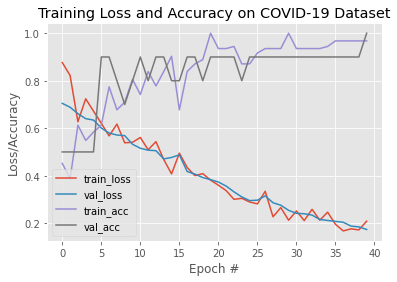

In [122]:
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on COVID-19 Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("results.png")

print("[INFO] saving COVID-19 detector model...")
model.save("testing.model", save_format="h5")

### Poner a prueba con tests

In [123]:
print("[INFO] evaluating network...")
predIdxs = model.predict(test1, batch_size=BS)
predIdxs = np.argmax(predIdxs, axis=1)
print(classification_report(test2.argmax(axis=1), predIdxs, target_names=lbs2.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

    test.jpg       0.50      1.00      0.67         1
   test2.jpg       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



/usr/local/Cellar/jupyterlab/3.0.14/libexec/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/Cellar/jupyterlab/3.0.14/libexec/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/Cellar/jupyterlab/3.0.14/libexec/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Encontramos mucha menos precisión. Ya que solo se predijo uno de los casos de test

In [124]:
cm = confusion_matrix(test2.argmax(axis=1), predIdxs)
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
print(cm)
print("acc: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))

[[1 0]
 [1 0]]
acc: 0.5000
sensitivity: 1.0000
specificity: 0.0000


# Conclusiones
Las redes neuronales también son ideales para ayudar a las personas a resolver problemas complejos en situaciones de la vida real. Pueden aprender y modelar las relaciones entre entradas y salidas que no son lineales y complejas; hacer generalizaciones e inferencias; revelar relaciones, patrones y predicciones ocultos; y modelar datos altamente volátiles. Como resultado, las redes neuronales pueden mejorar los procesos de decisión en diferentes áreas. Este caso, en el área de salud y en algo tan relevante como en los estragos que deja el Covid-19 en los pulmones despuéss de haberse enfermado.